In [1]:
from google.colab import files
uploaded = files.upload()

Saving India_Recovered_Cases_21.csv to India_Recovered_Cases_21.csv


In [2]:
import pandas as pd
df = pd.read_csv("India_Recovered_Cases_21.csv")
df.head()

,Date,Recovered
0,1/1/21,9929568
1,1/2/21,9927310
2,1/3/21,9946867
3,1/4/21,9975958
4,1/5/21,9997272


In [3]:
Death_cases = df['Recovered']

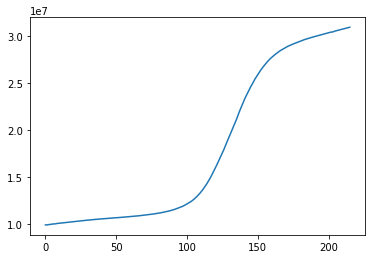

In [4]:
df['Recovered'].plot()

In [5]:
# univariate cnn example
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
#df = pd.read_csv("/content/drive/My Drive/Total_cases_Canada.csv")
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(Death_cases, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x= len(Death_cases)
pred_val = []
for i in range(x):
  i=Death_cases[i]
  x_input1=[i,i+1,i+2]
  x_input=np.asarray(x_input1)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=1)
  pred_val.append(yhat)
  print(yhat)
#x_input = array([1263, 1264, 1265])
#x_input = x_input.reshape((1, n_steps, n_features))
#yhat = model.predict(x_input, verbose=0)
#print(yhat)

1/1 [==============================] - 0s 92ms/step
[[10067838.]]
1/1 [==============================] - 0s 15ms/step
[[10065550.]]
1/1 [==============================] - 0s 13ms/step
[[10085379.]]
1/1 [==============================] - 0s 14ms/step
[[10114874.]]
1/1 [==============================] - 0s 15ms/step
[[10136485.]]
1/1 [==============================] - 0s 13ms/step
[[10156345.]]
1/1 [==============================] - 0s 15ms/step
[[10177168.]]
1/1 [==============================] - 0s 14ms/step
[[10177168.]]
1/1 [==============================] - 0s 14ms/step
[[10216258.]]
1/1 [==============================] - 0s 16ms/step
[[10233454.]]
1/1 [==============================] - 0s 13ms/step
[[10252096.]]
1/1 [==============================] - 0s 13ms/step
[[10270160.]]
1/1 [==============================] - 0s 14ms/step
[[10288059.]]
1/1 [==============================] - 0s 13ms/step
[[10304256.]]
1/1 [==============================] - 0s 18ms/step
[[10321469.]]
1/1 [=====

In [6]:
pred_val
predict= np.concatenate((pred_val))
Predict_cases=pd.DataFrame(predict)
Predict_cases['Predicted Cases']=Predict_cases
Predict_cases.pop(0)
Predict_cases
#predicted_cases= Predict_cases.join(india_Death_cases)
df = df.join(Predict_cases)
df
t1 = df

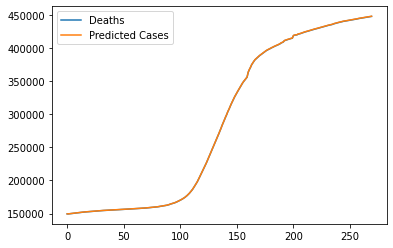

In [ ]:
t1.plot()

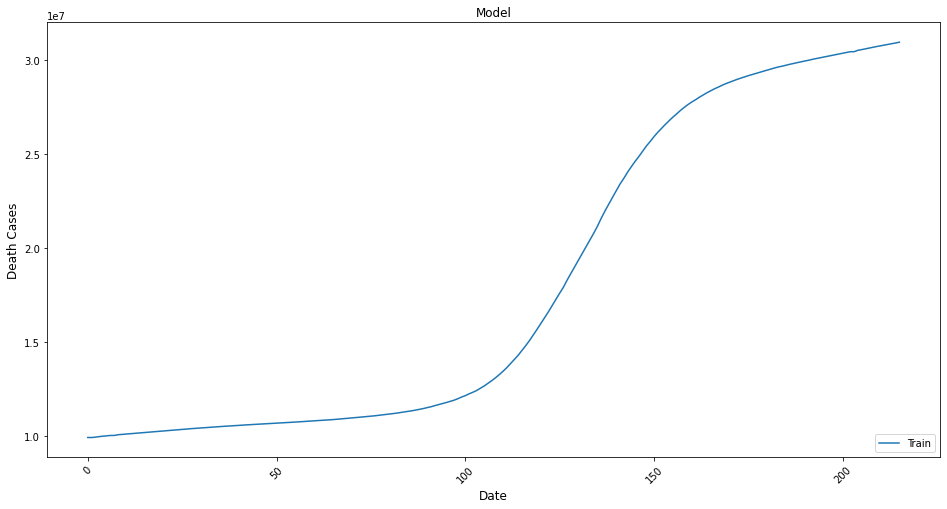

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Death Cases', fontsize=12)
plt.plot(t1['Recovered'])
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

In [9]:
from sklearn.metrics import r2_score
score = r2_score(t1['Recovered'], t1['Predicted Cases'])
score

0.9988773593796344